# Import Required Libraries

In [1]:
import sys
import os
os.chdir("..")
os.chdir("..")
os.chdir("./src")
# sys.path.append("./src")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pylab as pl

from PMF import *
from general_utils import *
from visualization_utils import * 

import warnings
warnings.filterwarnings("ignore")

notebook_name = 'Simplex'

# Source Generation and Mixing Scenario

In [3]:
N = 10000
NumberofSources = 3
NumberofMixtures = 5
Sgt = generate_correlated_copula_sources(rho = 0.0, df = 4, n_sources = NumberofSources, 
                                       size_sources = N , decreasing_correlation = True)

Sgt = 2 * Sgt - 1
print("The following is the correlation matrix of sources")
display_matrix(np.corrcoef(Sgt))

# Generate Mxr random mixing from i.i.d N(0,1)
Agt = np.random.randn(NumberofMixtures,NumberofSources)
Y = np.dot(Agt,Sgt)

SNR = 30
Y, NoisePart = addWGN(Y, SNR, return_noise = True)

SNRinp = 10 * np.log10(np.sum(np.mean((Y - NoisePart)**2, axis = 1)) / np.sum(np.mean(NoisePart**2, axis = 1)))
print("The following is the mixture matrix A")
display_matrix(Agt)
print("Input SNR is : {}".format(SNRinp))

The following is the correlation matrix of sources


<IPython.core.display.Math object>

The following is the mixture matrix A


<IPython.core.display.Math object>

Input SNR is : 30.06468375059712


# Visualize Generated Sources and Mixtures

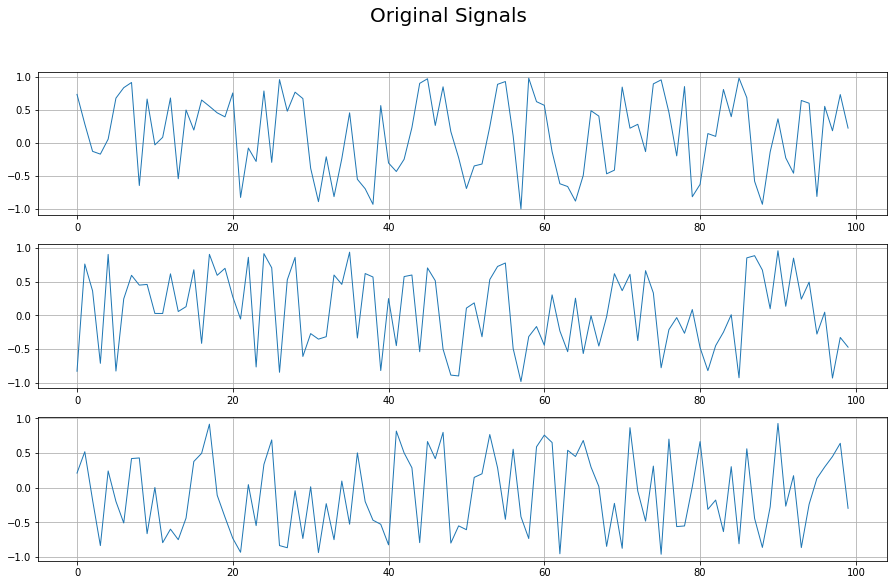

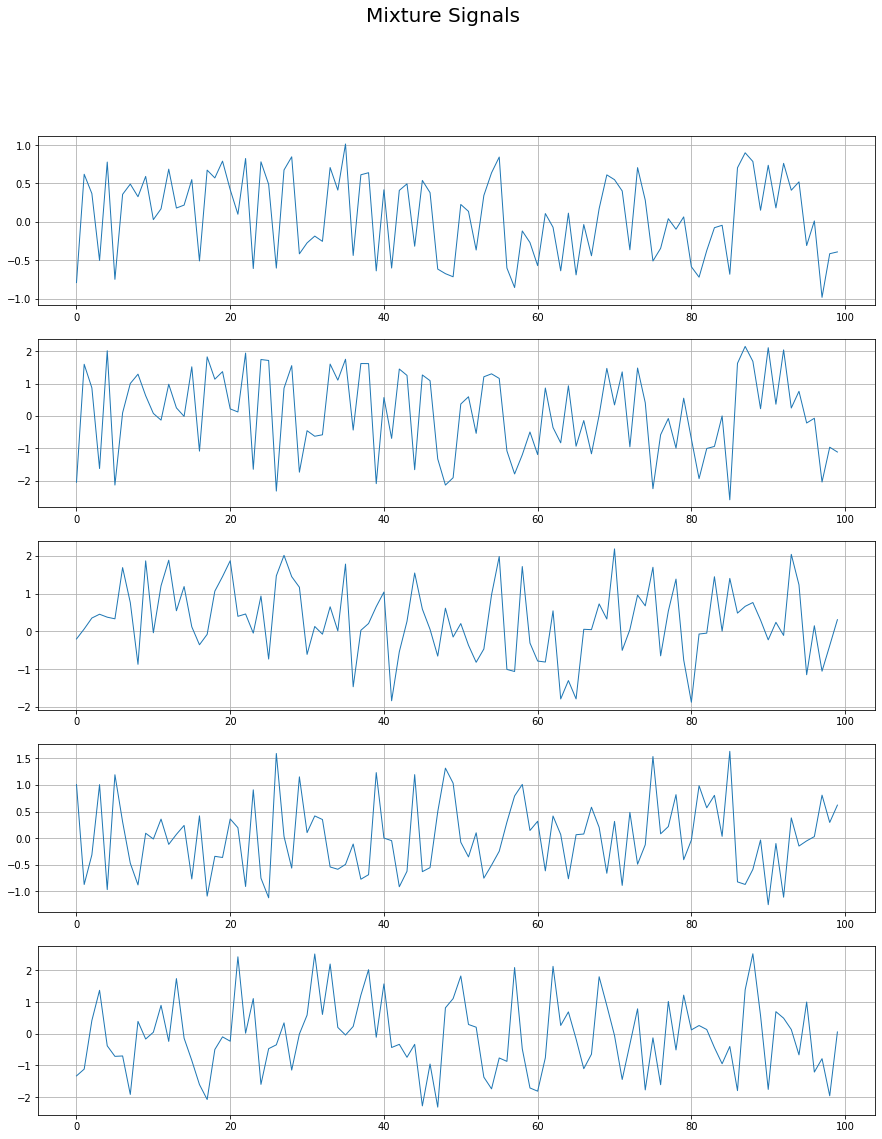

In [4]:
subplot_1D_signals(Sgt[:,0:100], title = 'Original Signals', figsize = (15.2,9), colorcode = None)
subplot_1D_signals(Y[:,0:100], title = 'Mixture Signals', figsize = (15,18), colorcode = None)

# Algorithm Hyperparameter Selection and Weight Initialization

In [5]:
s_dim = Sgt.shape[0]
y_dim = Y.shape[0]
debug_iteration_point = 5000
model = PMF(s_dim = s_dim, y_dim = y_dim,
            set_ground_truth = True, Sgt = Sgt, Agt = Agt)

# Run PMF Algorithm on Mixture Signals

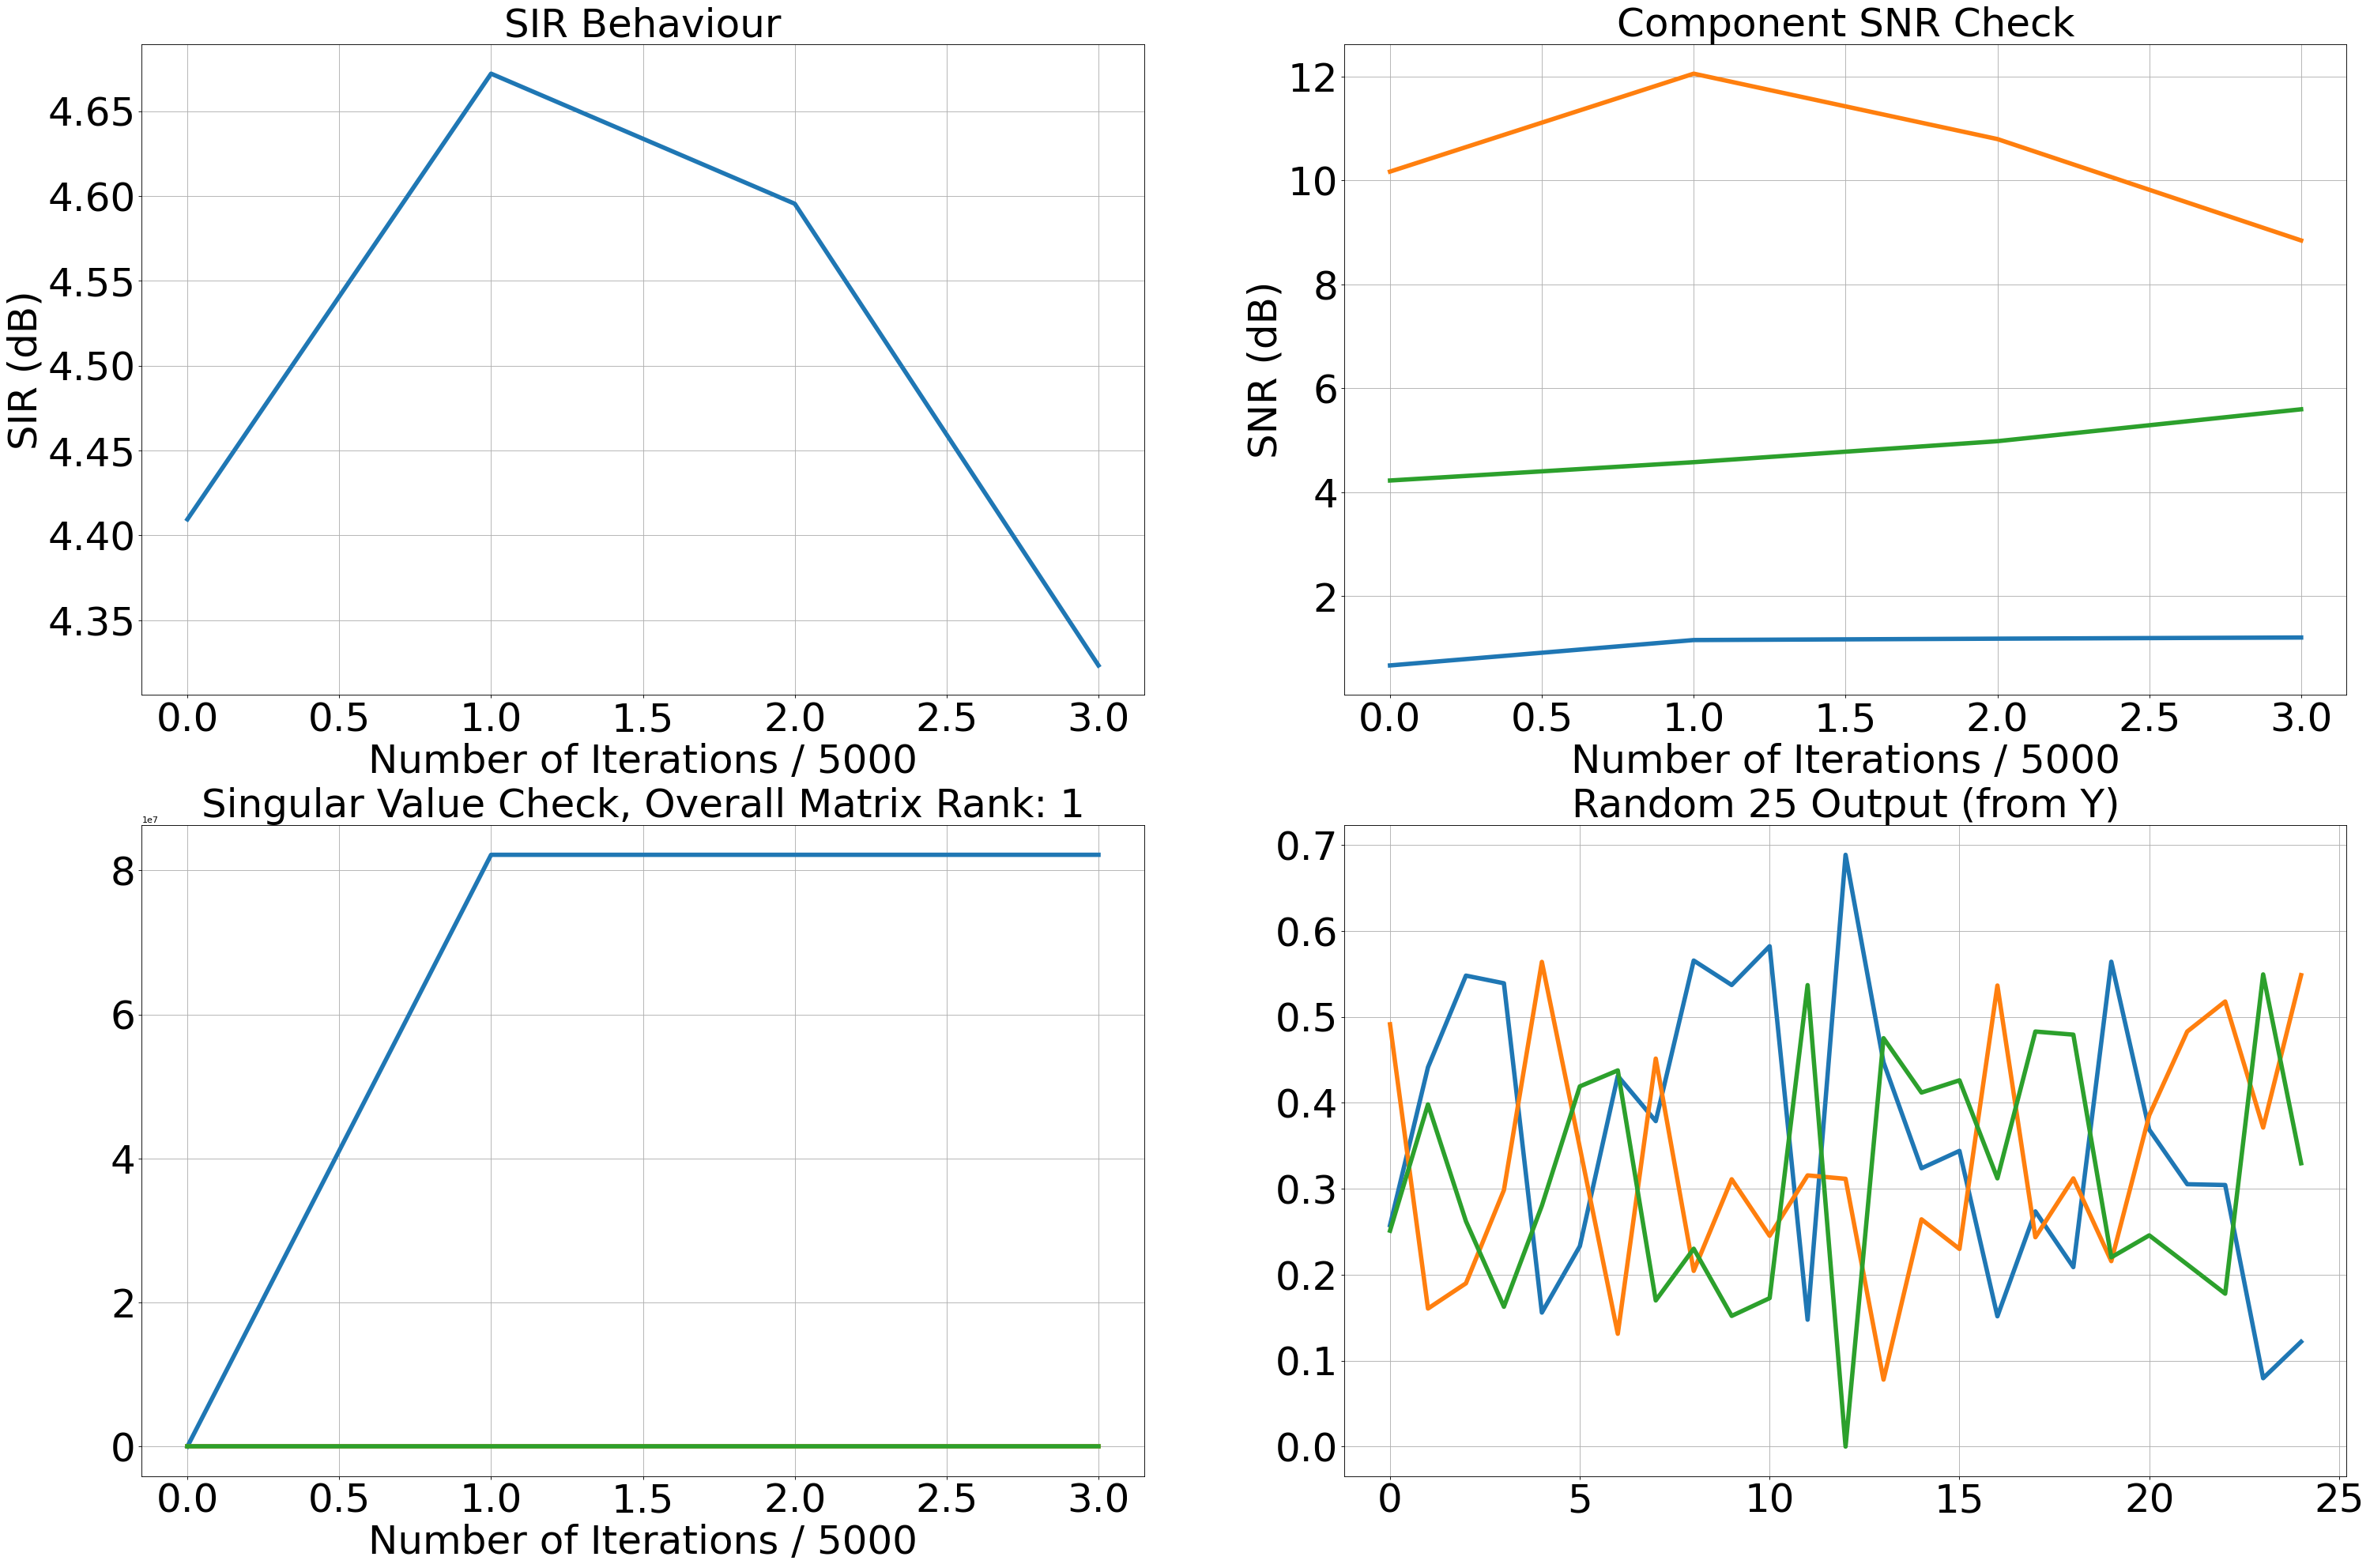

100%|██████████| 15000/15000 [00:58<00:00, 257.61it/s]


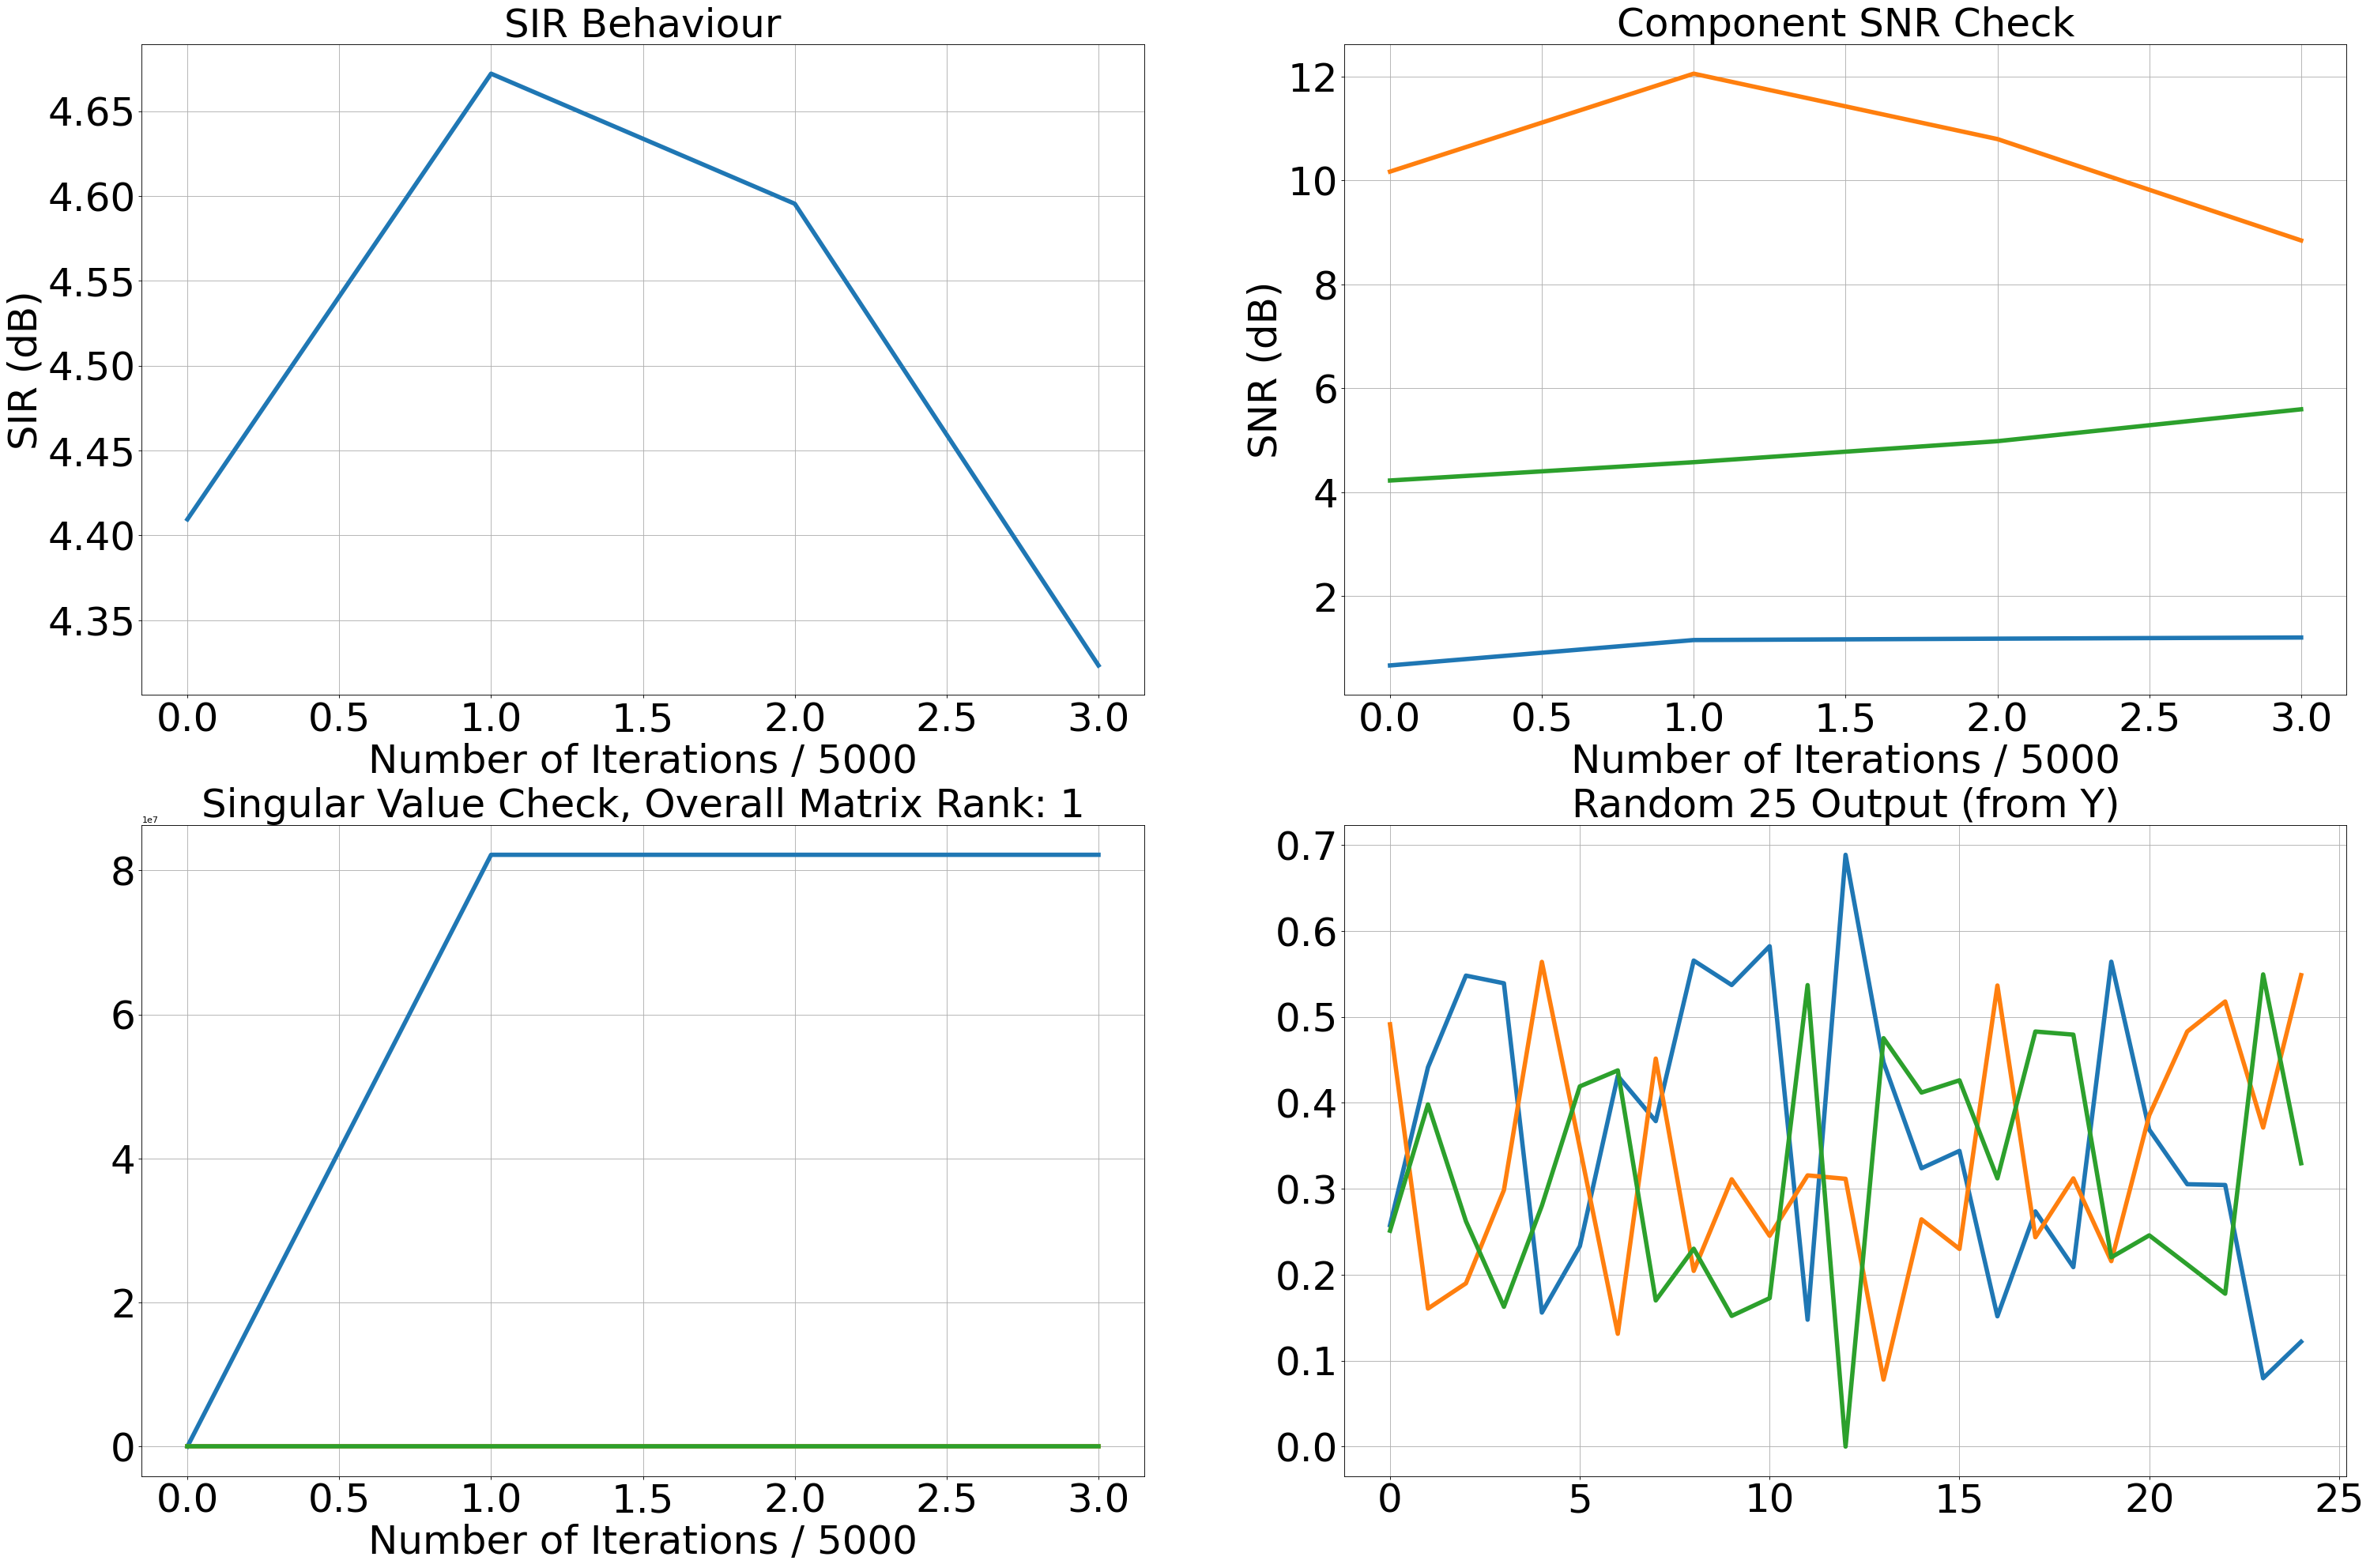

In [6]:
model.fit_batch_simplex(Y, n_iterations = 15000,
                        Lt = 50, lambda_ = 30, tau = 1e-8, 
                        debug_iteration_point = debug_iteration_point,
                        plot_in_jupyter = True)

# Calculate Resulting Component SNRs and Overall SINR

In [7]:
Y = model.S
Y_ = signed_and_permutation_corrected_sources(Sgt,Y)
coef_ = ((Y_ * Sgt).sum(axis = 1) / (Y_ * Y_).sum(axis = 1)).reshape(-1,1)
Y_ = coef_ * Y_

print("Component SNR Values : {}\n".format(snr_jit(Sgt, Y_)))

SINR = 10*np.log10(CalculateSINRjit(Y_, Sgt)[0])

print("Overall SINR : {}".format(SINR))

Component SNR Values : [0.12698387 0.66025518 0.49429438]

Overall SINR : 15.01926542985264


# Vizualize Extracted Signals Compared to Original Sources

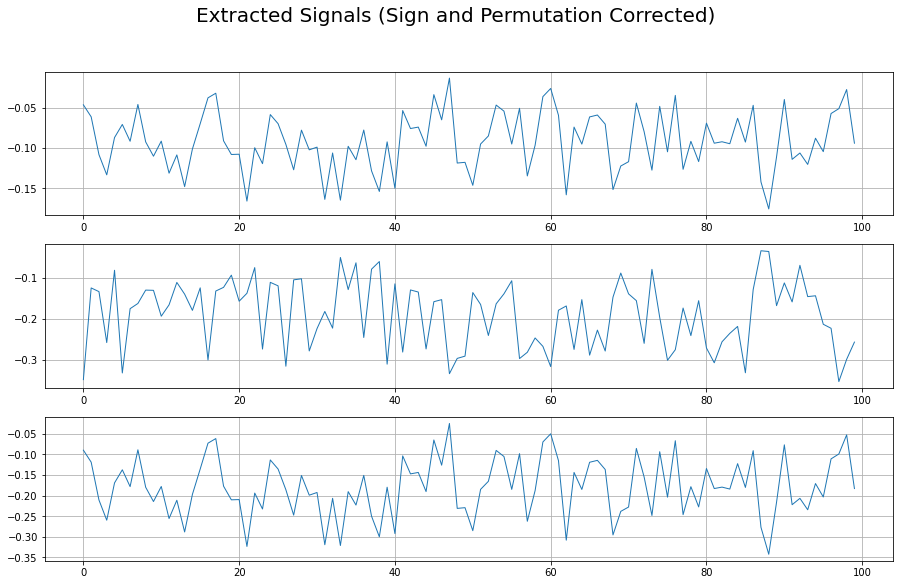

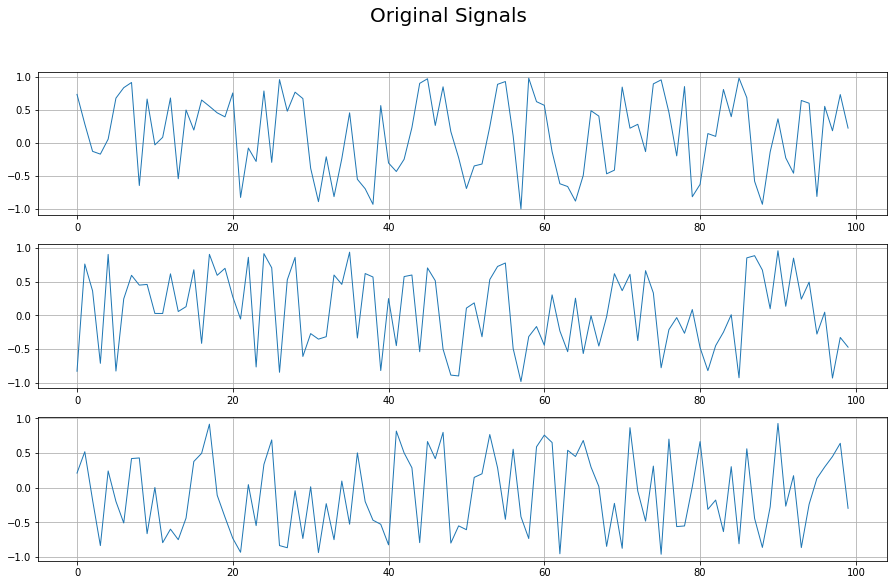

In [8]:
subplot_1D_signals(Y_[:,0:100], title = 'Extracted Signals (Sign and Permutation Corrected)', figsize = (15.2,9), colorcode = None)
subplot_1D_signals(Sgt[:,0:100], title = 'Original Signals', figsize = (15.2,9), colorcode = None)